# Trabajo Final Ciencia de Redes


## 1. Análisis exploratorio

### 1.1. Importar librerías y datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("../data/consolidado_reviews_Los_Ríos.xlsx")

### 1.2. Inspección inicial

Descripción de las columnas del dataset

| Columna        | Tipo        | Descripción                                                                                       |
|----------------|-------------|---------------------------------------------------------------------------------------------------|
| **N**          | Numérica    | Ranking de lugares con más reseñas.  |
| **place_id**   | Categórica  | Identificador único del lugar relacionado con la reseña.                                         |
| **name**       | Texto       | Nombre del lugar asociado al registro.                                                          |
| **id_review**  | Categórica  | Identificador único de la reseña proporcionada por un usuario.                                   |
| **user_name**  | Texto       | Nombre del usuario que dejó la reseña.                                                          |
| **id_usuario** | Categórica  | Identificador único del usuario que dejó la reseña.                                             |
| **stars**      | Numérica    | Calificación asignada por el usuario, con valores de 1 a 5 estrellas.                           |
| **link_review**| Texto       | Enlace a la reseña completa en la plataforma correspondiente.                                   |
| **fecha**      | Categórica  | Fecha y hora en que se realizó la reseña (en formato ISO 8601).                                 |
| **review**     | Texto       | Comentario de la reseña, si fue proporcionado (puede estar vacío).                              |


In [4]:
# Visualizar las primeras filas del dataset
data.head()

,N,place_id,name,id_review,user_name,id_usuario,stars,link_review,fecha,review
0,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYbzgzN29BRRAB,angie cardona,103326493536057771398,5,https://www.google.com/maps/contrib/1033264935...,2024-10-30T17:50:02.384466,"Excelente atención, la comida fue deliciosa!! ..."
1,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSURYMmJPampnRRAB,Fabian Aruani,117348510194376829755,3,https://www.google.com/maps/contrib/1173485101...,2024-10-29T11:17:02.664924,NaN
2,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChZDSUhNMG9nS0VJQ0FnSURYb01lUkFREAE,Nataniel Lavado,115312318540115775891,5,https://www.google.com/maps/contrib/1153123185...,2024-10-22T20:31:57.541034,Atendido por sus dueños exelente
3,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSUNYLTdiY2tBRRAB,Leonardo Enrique García Riquelme,100519139671583772741,4,https://www.google.com/maps/contrib/1005191396...,2024-10-21T02:57:42.891824,NaN
4,89,ChIJS5lcdLBVEZYRFa_Y_RuCV1g,Restaurant Puerto Fuy,ChdDSUhNMG9nS0VJQ0FnSUNYdTdlYTZBRRAB,Andres Herrera,117104494720799796058,5,https://www.google.com/maps/contrib/1171044947...,2024-10-21T01:39:11.791360,NaN


In [5]:
# Resumen de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479343 entries, 0 to 479342
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   N            479343 non-null  int64 
 1   place_id     479343 non-null  object
 2   name         479343 non-null  object
 3   id_review    479343 non-null  object
 4   user_name    479343 non-null  object
 5   id_usuario   479343 non-null  object
 6   stars        479343 non-null  int64 
 7   link_review  479343 non-null  object
 8   fecha        479343 non-null  object
 9   review       233588 non-null  object
dtypes: int64(2), object(8)
memory usage: 36.6+ MB


In [6]:
data.isnull().sum()

N                   0
place_id            0
name                0
id_review           0
user_name           0
id_usuario          0
stars               0
link_review         0
fecha               0
review         245755
dtype: int64

- El dataset tiene 479.343 filas y 10 columnas, de las cuales 2 son numéricas (``N``, ``stars``) y 8 de texto.
- Valores faltantes: La columna ``review`` tiene 245.755 valores faltantes, lo que representa el 51,2%

In [7]:
# Descripción de los datos numéricos
data.describe()

,N,stars
count,479343.000000,479343.00000
mean,167.500502,4.47993
std,241.664960,0.98409
min,1.000000,1.00000
25%,12.000000,4.00000
50%,64.000000,5.00000
75%,217.000000,5.00000
max,1426.000000,5.00000


- ``N``: Rango de 1 a 1426.
- ``stars``: Rango de 1 a 5, con una media de ``4.48`` y una desviación estandar de ``0.98``, indicando una tendencia hacia calificaciones positivas.


### 1.3. Distribución de las calificaciones

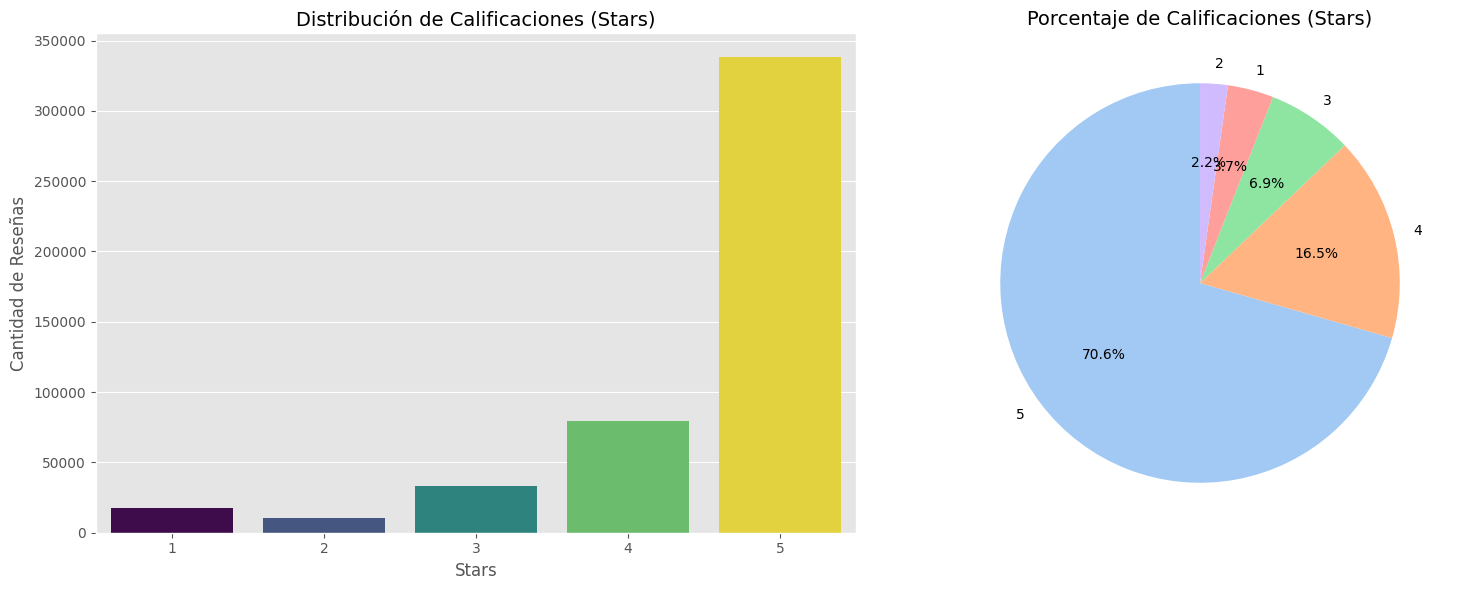

In [25]:
# Datos para gráfico de torta
stars_counts = data['stars'].value_counts()
stars_labels = stars_counts.index
stars_sizes = stars_counts.values

# Crear figura con 2 subplots: bar chart and pie chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart: Distribución de Calificaciones
sns.countplot(ax=axes[0], x='stars', data=data, palette='viridis', hue="stars", legend=False)
axes[0].set_title('Distribución de Calificaciones (Stars)', fontsize=14)
axes[0].set_xlabel('Stars', fontsize=12)
axes[0].set_ylabel('Cantidad de Reseñas', fontsize=12)
axes[0].tick_params(axis='both', labelsize=10)

# Pie chart: Porcentaje de Calificaciones
axes[1].pie(stars_sizes, labels=stars_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(stars_sizes)))
axes[1].set_title('Porcentaje de Calificaciones (Stars)', fontsize=14)

plt.tight_layout()
plt.show()

Los gráficos muestran la distribución  y el porcentaje de las calificaciones (``stars``) en el dataset

- El 87,5% de las calificaciones están concentradas en 5 y 4 estrellas, siendo la puntuación más alta la más frecuente con 70,6%,  indicando una tendencia hacia valoraciones positivas.
- Solo el 5,7% son calificaciones bajas (1 o 2 estrellas), lo que podría reflejar satisfacción general con los lugares visitados.

### 1.4. Análisis temporal de las reseñas

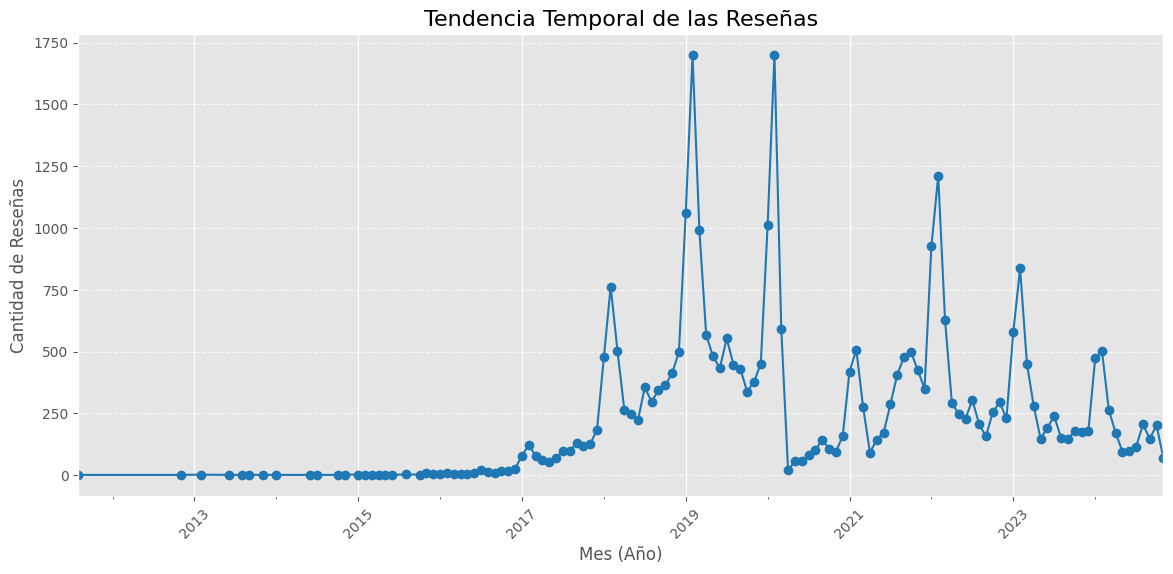

In [27]:
# Convertir la columna 'fecha' al formato datetime y eliminar información de zona horaria
data['fecha'] = pd.to_datetime(data['fecha'], errors='coerce', utc=True).dt.tz_convert(None)

# Extraer año y mes para análisis temporal
data['year'] = data['fecha'].dt.year
data['month'] = data['fecha'].dt.to_period('M')

# Agrupar los datos por mes y contar las reseñas
reviews_by_month = data.groupby('month').size()

# Graficar la tendencia de reseñas a lo largo del tiempo
plt.figure(figsize=(14, 6))
reviews_by_month.plot(kind='line', marker='o', color='tab:blue')

plt.title('Tendencia Temporal de las Reseñas', fontsize=16)
plt.xlabel('Mes (Año)', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

Se observa que desde el año 2017 aproximadamente, hay un incremento en las cantidades de reseñas, con con peaks importantes desde el año 2019.

D:\Users\camilo.rivera\AppData\Local\Temp\ipykernel_22416\1975780862.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['month_numeric'] = data_filtered['fecha'].dt.month  # Extract month as a numeric value


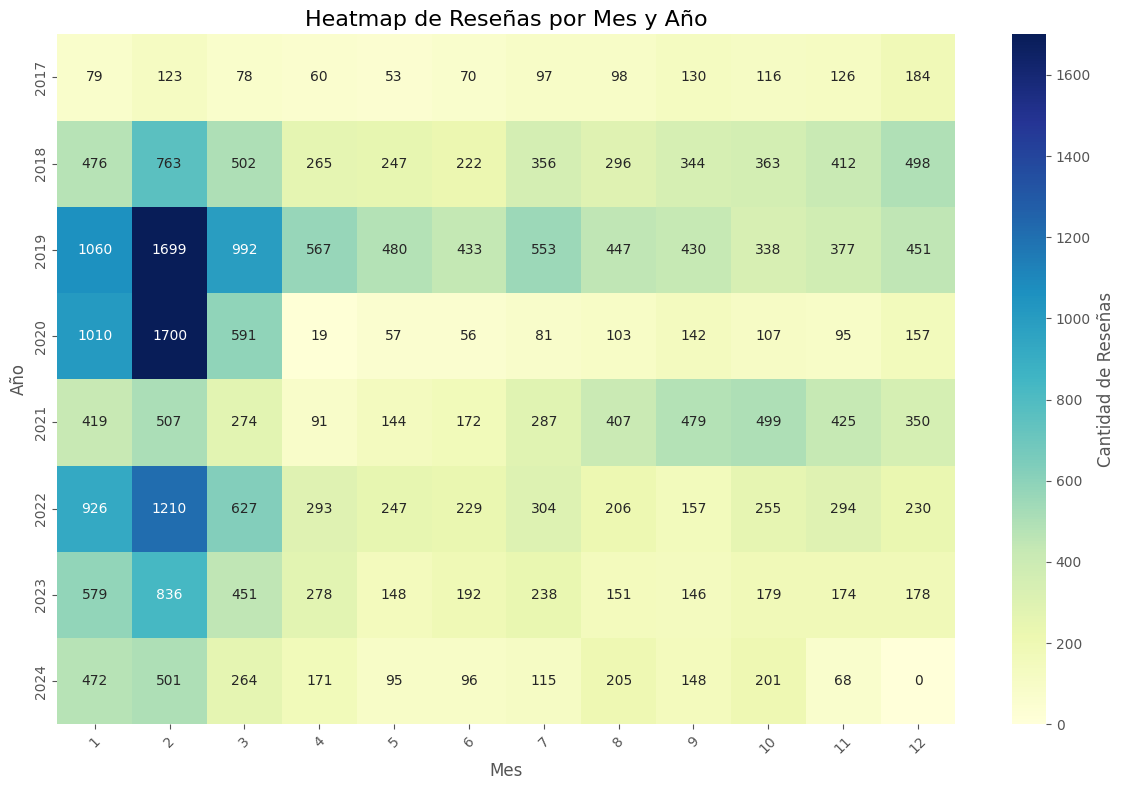

In [ ]:
# filtrar datos desde 2017
data_filtered = data[data['year'] >= 2017]

# Datos para heatmap
data_filtered['month_numeric'] = data_filtered['fecha'].dt.month  # Extract month as a numeric value
heatmap_data = data_filtered.pivot_table(
    index='year',
    columns='month_numeric',
    values='N',
    aggfunc='count',
    fill_value=0
)

# Dibujar el gráfico
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Cantidad de Reseñas'})

plt.title('Heatmap de Reseñas por Mes y Año', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.xticks(np.arange(12) + 0.5, [str(i) for i in range(1, 13)], rotation=45, fontsize=10)
plt.yticks(np.arange(len(heatmap_data.index)) + 0.5, heatmap_data.index.astype(int), fontsize=10)  # Remove decimals
plt.tight_layout()
plt.show()


En el heatmap se observa un patrón claro donde los meses de verano (enero a marzo) concentran la mayor cantidad de reseñas, reflejando un aumento estacional significativo. A partir de 2019, se aprecia un crecimiento notable en la actividad de reseñas, seguido por una disminución considerable en 2021. Durante este año, los meses con más calificaciones se concentran entre agosto y noviembre, posiblemente como consecuencia de la pandemia, que pudo haber afectado los desplazamientos de los usuarios y la actividad de los lugares reseñados.

### 1.5. Lugares más reseñados y top 10 lugares con mejores calificaciones

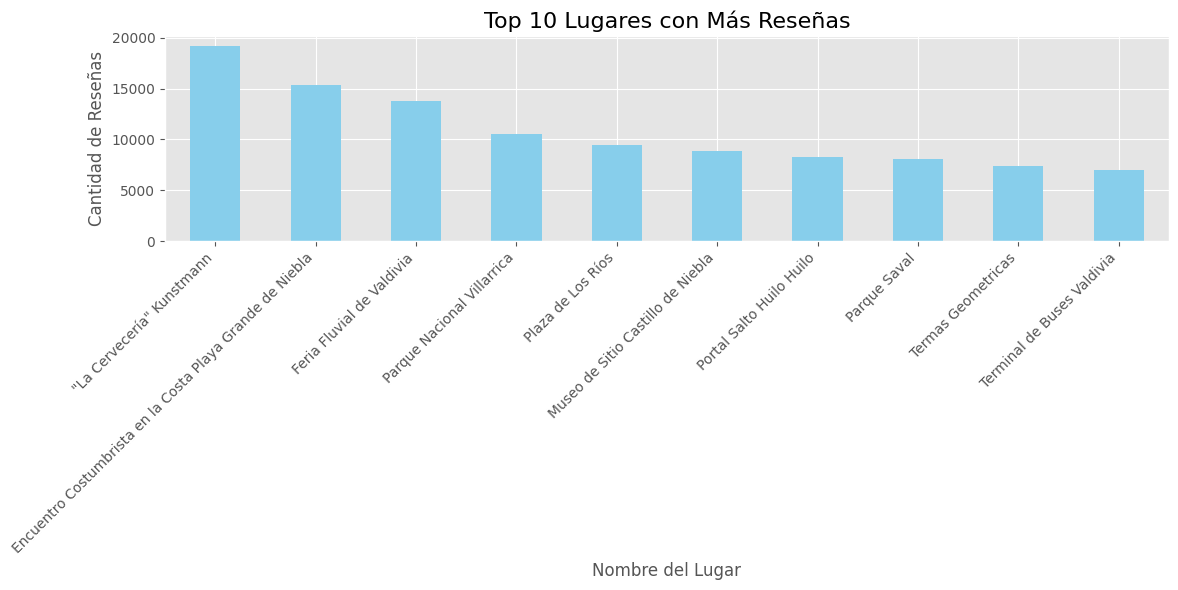

In [38]:
# Get the top 10 most reviewed places
top_places = data['place_id'].value_counts().head(10)

# Map place_id to their corresponding names for the top 10 places
top_places_names = data[data['place_id'].isin(top_places.index)][['place_id', 'name']].drop_duplicates()
place_name_mapping = dict(zip(top_places_names['place_id'], top_places_names['name']))

# Replace place_id with names in the top 10 data
top_places.index = top_places.index.map(place_name_mapping)

# Plot the top places with names as x-axis labels
plt.figure(figsize=(12, 6))
top_places.plot(kind='bar', color='skyblue')

plt.title('Top 10 Lugares con Más Reseñas', fontsize=16)
plt.xlabel('Nombre del Lugar', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [49]:
# Calcular el promedio de calificaciones para cada lugar
promedio_notas = data.groupby('place_id')['stars'].mean()

# Obtener el Top 10 lugares más reseñados basándose en el ranking (N)
top_10_places_with_avg = (
    data[['place_id', 'name', 'N']]
    .drop_duplicates(subset='place_id')  # Evitar duplicados
    .sort_values(by='N', ascending=True)  # Ordenar por N (ranking)
    .head(10)  # Seleccionar los 10 primeros
)

# Agregar la columna del promedio de calificaciones
top_10_places_with_avg['promedio_notas'] = top_10_places_with_avg['place_id'].map(promedio_notas)
top_10_places_with_avg.reset_index(drop=True, inplace=True)
top_10_places_with_avg


,place_id,name,N,promedio_notas
0,ChIJJcMHcuDxFZYRh3RxmakDaeM,"""La Cervecería"" Kunstmann",1,4.522584
1,ChIJlTOXxML2FZYRmZFsQRQw0hc,Encuentro Costumbrista en la Costa Playa Grand...,2,4.566486
2,ChIJ-42YknXuFZYRuFGWdFHYLMM,Feria Fluvial de Valdivia,3,4.524465
3,ChIJoTAEFcKSE5YREgDyBNMbf7M,Parque Nacional Villarrica,4,4.748346
4,ChIJrVigQXfuFZYRbJtFZRqJFbk,Plaza de Los Ríos,5,4.105369
5,ChIJxe2WQeT2FZYRzVmiXAouxDs,Museo de Sitio Castillo de Niebla,6,4.683427
6,ChIJUdgVg6qqFpYR85FArcIFSf8,Portal Salto Huilo Huilo,7,4.722242
7,ChIJCUIQseftFZYRdVEYpQzXe0c,Parque Saval,8,4.669613
8,ChIJK62_9UGLE5YRJfokTn6JhrE,Termas Geometricas,9,4.686053
9,ChIJdaOzb63vFZYR6PZZ-KvEMac,Terminal de Buses Valdivia,10,4.441346


En el ranking basado en la columna N, que parece representar un indicador de popularidad o preferencia, destacan lugares icónicos como "La Cervecería Kunstmann" y el Encuentro Costumbrista en la Costa Playa Grande, los cuales ocupan los primeros puestos. Esto sugiere que estos lugares son frecuentemente visitados o reseñados por los usuarios. Lugares como el Terminal de Buses Valdivia y las Termas Geométricas, aunque aparecen más abajo en el ranking, siguen siendo puntos de interés relevantes.

In [50]:
# Ordenar el Top 10 por el promedio de calificaciones (average_stars) de mayor a menor
top_10_por_promedio_notas = top_10_places_with_avg.sort_values(by='promedio_notas', ascending=False)

# Mostrar la tabla final ordenada por promedio de calificaciones
top_10_por_promedio_notas.reset_index(drop=True, inplace=True)
top_10_por_promedio_notas


,place_id,name,N,promedio_notas
0,ChIJoTAEFcKSE5YREgDyBNMbf7M,Parque Nacional Villarrica,4,4.748346
1,ChIJUdgVg6qqFpYR85FArcIFSf8,Portal Salto Huilo Huilo,7,4.722242
2,ChIJK62_9UGLE5YRJfokTn6JhrE,Termas Geometricas,9,4.686053
3,ChIJxe2WQeT2FZYRzVmiXAouxDs,Museo de Sitio Castillo de Niebla,6,4.683427
4,ChIJCUIQseftFZYRdVEYpQzXe0c,Parque Saval,8,4.669613
5,ChIJlTOXxML2FZYRmZFsQRQw0hc,Encuentro Costumbrista en la Costa Playa Grand...,2,4.566486
6,ChIJ-42YknXuFZYRuFGWdFHYLMM,Feria Fluvial de Valdivia,3,4.524465
7,ChIJJcMHcuDxFZYRh3RxmakDaeM,"""La Cervecería"" Kunstmann",1,4.522584
8,ChIJdaOzb63vFZYR6PZZ-KvEMac,Terminal de Buses Valdivia,10,4.441346
9,ChIJrVigQXfuFZYRbJtFZRqJFbk,Plaza de Los Ríos,5,4.105369


Al analizar el promedio de calificaciones (stars), lugares como el Parque Nacional Villarrica y Portal Salto Huilo Huilo sobresalen con calificaciones promedio superiores a 4.7, lo que refleja una alta satisfacción de los visitantes. Por otro lado, las Termas Geometricas también se distingue con un promedio elevado, reforzando su percepción positiva entre los usuarios. En contraste, la Plaza de Los Ríos, aunque rankeada entre los primeros 10, tiene un promedio más bajo, indicando una experiencia más variable o críticas más negativas.

En general, se observa una alineación parcial entre el ranking y el promedio de calificaciones, donde algunos lugares bien posicionados en el ranking mantienen altas calificaciones, mientras que otros presentan calificaciones más moderadas. Esto podría indicar que la popularidad no siempre es sinónimo de satisfacción.